 # Observations and Insights
 
#1. Summary statistics table showed two promissing drig regimens: Capomulin and Ramicane, with the lowest median of 41-42 mm3, followed by additional two regimens: Infubinol, and Ceftamin, with median tumor volume of around 52 mm3.
#2. Capomulin and Ramicane passed increased number of tests vs. other drugs regimens.
#3. There are nearly equal amount of female and male tested mice.
#4. From box plots analysis of final tumor volume of four promissing drig regimens, Capomulin and Ramicane showed the lowest IQRs of 9.1 and 7.8, with medians below the initial tumor volume of 45 mm3; followd by Infubinol and Ceftamin having IQRs of 11.5 and 15.6, respectively, with medians above the initial tumor volume of 45 mm3. This represents positive treatment effect and lower data spread for Capomulin and Ramicane; and negative treatment effect (no effect) and significantly larger data spread for Infubinol and Ceftamin. In addition, in Infubinol group one otlier data point was found, with the final tumor volume below 36.8 mm3. (Ramicane group showed homogenous data spread (closest values of mean and median) and slightly lower median vs. Capomulin).
#5. 1 and 10 randomly chosen Capomulin-treated mice showed decrease in the tumor volume with a time from the initial volume (seen on line and scatter plots of tumor volume vs. time).
#6. There is a strong positive correlation between the mice weight and average tumor volume in Capomulin-treated mice group, with a correlation factor of 0.84 (average tumor volume is increaseing with the incease in mouse weight).
#7. Some limiations of the data set (reccomendation for the laboratory team): mice weight must be changing during the treatments, and looks like it was not recorded (can be just the initial weight for each mouse). 


##Dependencies

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata.head()

# Combine the data into a single dataset


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [73]:
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [74]:
combined_mice = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
combined_mice = combined_mice.set_index('Mouse ID')
combined_mice.head()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
grouped_drug_regimen = combined_mice.groupby(['Drug Regimen'])
grouped_drug_regimen.head(20)


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
c927,Propriva,Female,4,26,25,56.545519,2
c927,Propriva,Female,4,26,30,60.753925,2
c927,Propriva,Female,4,26,35,61.872274,3


In [76]:
mean_drug_regimen = grouped_drug_regimen['Tumor Volume (mm3)'].mean()
mean_drug_regimen = round(mean_drug_regimen, 2)
mean_drug_regimen


Drug Regimen
Capomulin    40.68
Ceftamin     52.59
Infubinol    52.88
Ketapril     55.24
Naftisol     54.33
Placebo      54.03
Propriva     52.32
Ramicane     40.22
Stelasyn     54.23
Zoniferol    53.24
Name: Tumor Volume (mm3), dtype: float64

In [77]:
med_drug_regimen = grouped_drug_regimen['Tumor Volume (mm3)'].median()
med_drug_regimen = round(med_drug_regimen, 2)
med_drug_regimen


Drug Regimen
Capomulin    41.56
Ceftamin     51.78
Infubinol    51.82
Ketapril     53.70
Naftisol     52.51
Placebo      52.29
Propriva     50.85
Ramicane     40.67
Stelasyn     52.43
Zoniferol    51.82
Name: Tumor Volume (mm3), dtype: float64

In [78]:
vr_drug_regimen = grouped_drug_regimen['Tumor Volume (mm3)'].var()
vr_drug_regimen = round(vr_drug_regimen, 2)
vr_drug_regimen


Drug Regimen
Capomulin    24.95
Ceftamin     39.29
Infubinol    43.13
Ketapril     68.55
Naftisol     66.17
Placebo      61.17
Propriva     42.35
Ramicane     23.49
Stelasyn     59.45
Zoniferol    48.53
Name: Tumor Volume (mm3), dtype: float64

In [79]:
st_drug_regimen = grouped_drug_regimen['Tumor Volume (mm3)'].std()
st_drug_regimen = round(st_drug_regimen, 2)
st_drug_regimen


Drug Regimen
Capomulin    4.99
Ceftamin     6.27
Infubinol    6.57
Ketapril     8.28
Naftisol     8.13
Placebo      7.82
Propriva     6.51
Ramicane     4.85
Stelasyn     7.71
Zoniferol    6.97
Name: Tumor Volume (mm3), dtype: float64

In [80]:
combined_stat_drug = pd.merge(mean_drug_regimen, med_drug_regimen, how="left", on=["Drug Regimen"])
#combined_stat_drug = combined_stat_drug.set_index('Mouse ID')
combined_stat_drug.head()


,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
Drug Regimen,,
Capomulin,40.68,41.56
Ceftamin,52.59,51.78
Infubinol,52.88,51.82
Ketapril,55.24,53.70
Naftisol,54.33,52.51


In [81]:
combined_stat_drug = combined_stat_drug.rename(columns = {
    "Tumor Volume (mm3)_x": "Mean Tumor Volume (mm3)",
    "Tumor Volume (mm3)_y": "Median Tumor Volume (mm3)"
})
combined_stat_drug.head()


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3)
Drug Regimen,,
Capomulin,40.68,41.56
Ceftamin,52.59,51.78
Infubinol,52.88,51.82
Ketapril,55.24,53.70
Naftisol,54.33,52.51


In [82]:
combined_stat_drug = pd.merge(combined_stat_drug, vr_drug_regimen, how="left", on=["Drug Regimen"])
combined_stat_drug.head()


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,40.68,41.56,24.95
Ceftamin,52.59,51.78,39.29
Infubinol,52.88,51.82,43.13
Ketapril,55.24,53.70,68.55
Naftisol,54.33,52.51,66.17


In [83]:
combined_stat_drug = pd.merge(combined_stat_drug, st_drug_regimen, how="left", on=["Drug Regimen"])
combined_stat_drug.head()


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
Drug Regimen,,,,
Capomulin,40.68,41.56,24.95,4.99
Ceftamin,52.59,51.78,39.29,6.27
Infubinol,52.88,51.82,43.13,6.57
Ketapril,55.24,53.70,68.55,8.28
Naftisol,54.33,52.51,66.17,8.13


In [84]:
combined_stat_drug = combined_stat_drug.rename(columns = {
    "Tumor Volume (mm3)_x": "Variance Tumor Volume (mm3)",
    "Tumor Volume (mm3)_y": "Std. Deviation Tumor Volume (mm3)"
})
combined_stat_drug


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std. Deviation Tumor Volume (mm3)
Drug Regimen,,,,
Capomulin,40.68,41.56,24.95,4.99
Ceftamin,52.59,51.78,39.29,6.27
Infubinol,52.88,51.82,43.13,6.57
Ketapril,55.24,53.70,68.55,8.28
Naftisol,54.33,52.51,66.17,8.13
Placebo,54.03,52.29,61.17,7.82
Propriva,52.32,50.85,42.35,6.51
Ramicane,40.22,40.67,23.49,4.85
Stelasyn,54.23,52.43,59.45,7.71


## Bar plots

In [85]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count_drug_regimen = grouped_drug_regimen['Tumor Volume (mm3)'].count()
count_drug_regimen


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

Text(0, 0.5, 'Number of data points')

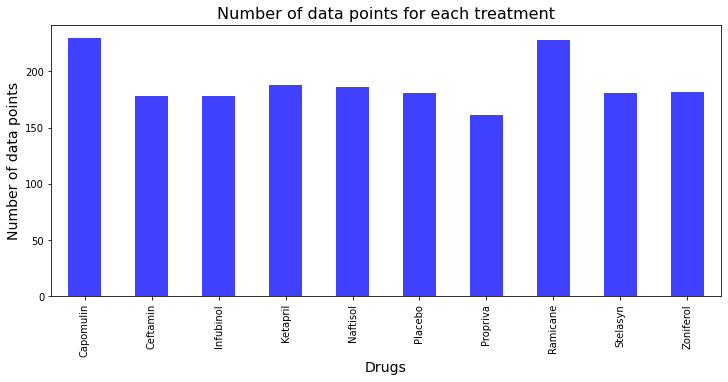

In [86]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count_drug_regimen.plot.bar(rot=90, color='b', alpha=0.75, figsize=(12,5))
plt.title("Number of data points for each treatment", fontsize=16)
plt.xlabel("Drugs", fontsize=14)
plt.ylabel("Number of data points", fontsize=14)


Text(0, 0.5, 'Number of data points')

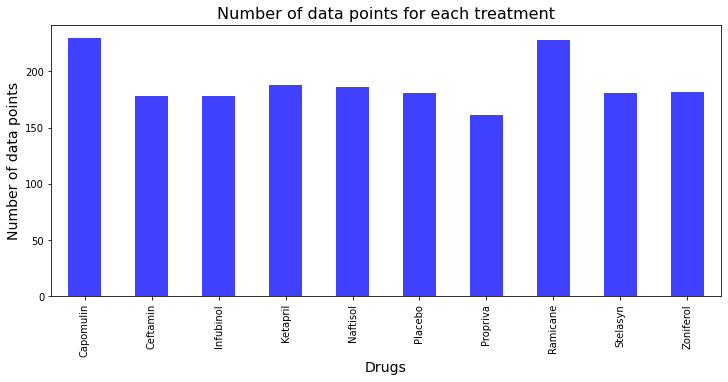

In [87]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
count_drug_regimen.plot(kind='bar', color='b', alpha=0.75, figsize=(12,5), align='center')
plt.title("Number of data points for each treatment", fontsize=16)
plt.xlabel("Drugs", fontsize=14)
plt.ylabel("Number of data points", fontsize=14)


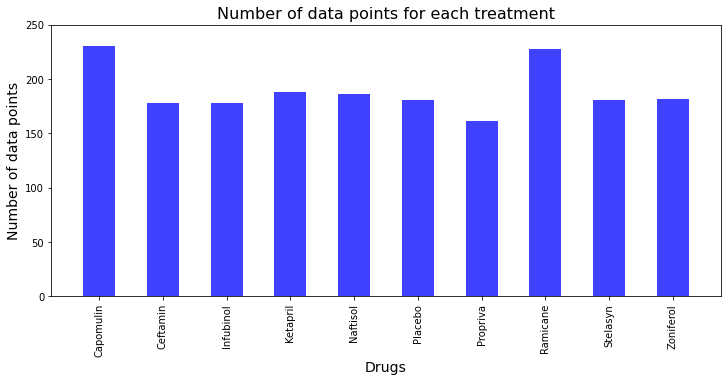

In [88]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drugs = count_drug_regimen.keys()
x_axis = np.arange(len(drugs))
plt.figure(figsize=(12,5))

plt.xlim(-0.75, len(drugs)-0.25)
plt.ylim(0, max(count_drug_regimen)+20)

count_drug_bp = plt.bar(drugs, count_drug_regimen, width=0.5, facecolor='b', alpha=0.75, align='center')

plt.title("Number of data points for each treatment", fontsize=16)
plt.xlabel("Drugs", fontsize=14)
plt.ylabel("Number of data points", fontsize=14)

plt.xticks(drugs, rotation='vertical')
plt.show()


## Pie plots

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_mice_fm = mouse_metadata.groupby(['Sex'])
count_mice_fm = grouped_mice_fm['Sex'].count()
count_mice_fm


Sex
Female    124
Male      125
Name: Sex, dtype: int64

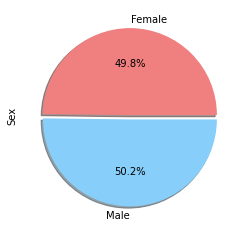

In [90]:
#labels = count_mice_fm.index
mice_sex = count_mice_fm.keys()
explode = (0, 0.05)
colors = ["lightcoral", "lightskyblue"]
count_mice_fm.plot.pie(explode=explode, colors=colors, labels=mice_sex, autopct='%1.1f%%', shadow=True)


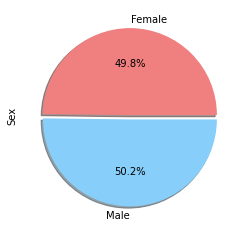

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_mice_fm.plot(kind='pie', colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)


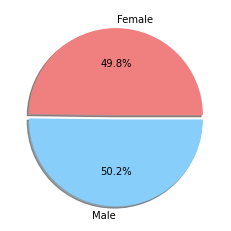

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
micefm = plt.pie(count_mice_fm, labels=mice_sex, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)
#plt.axis("equal")


## Quartiles, outliers and boxplots

In [93]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
combined_mice.head()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [94]:
mice_fv=combined_mice.groupby(['Mouse ID']).max()
mice_fv=mice_fv.reset_index()
mice_fv.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [95]:
mice_group = mice_fv[['Mouse ID','Timepoint']].merge(combined_mice,on=['Mouse ID','Timepoint'],how="left")
mice_group.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [96]:
capomulin_mice_fv = mice_group.loc[(mice_group['Drug Regimen'] == 'Capomulin')]['Tumor Volume (mm3)']
capomulin_mice_fv.head()

19    38.982878
24    38.939633
61    30.485985
64    37.074024
66    40.159220
Name: Tumor Volume (mm3), dtype: float64

In [97]:
ramicane_mice_fv = mice_group.loc[(mice_group['Drug Regimen'] == 'Ramicane')]['Tumor Volume (mm3)']
ramicane_mice_fv.head()

6     38.407618
7     43.047543
10    38.810366
12    32.978522
33    38.342008
Name: Tumor Volume (mm3), dtype: float64

In [98]:
infubinol_mice_fv = mice_group.loc[(mice_group['Drug Regimen'] == 'Infubinol')]['Tumor Volume (mm3)']
infubinol_mice_fv.head()

0     67.973419
1     65.525743
11    57.031862
13    66.083066
27    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [99]:
ceftamin_mice_fv = mice_group.loc[(mice_group['Drug Regimen'] == 'Ceftamin')]['Tumor Volume (mm3)']
ceftamin_mice_fv.head()

3     62.999356
21    45.000000
22    56.057749
25    55.742829
58    48.722078
Name: Tumor Volume (mm3), dtype: float64

In [100]:
quartiles = ramicane_mice_fv.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"IQR of Ramicane is: {round(iqr, 2)}")
print(f"Values below {round(lower_bound, 2)} could be outliers.")
print(f"Values above {round(upper_bound, 2)} could be outliers.")
ramicane_otliers = ramicane_mice_fv.loc[(ramicane_mice_fv <= lower_bound) | (ramicane_mice_fv >= upper_bound)]

IQR of Ramicane is: 9.1
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [101]:
quartiles = capomulin_mice_fv.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"IQR of Capomulin is: {round(iqr, 2)}")
print(f"Values below {round(lower_bound, 2)} could be outliers.")
print(f"Values above {round(upper_bound, 2)} could be outliers.")

capomulin_otliers = capomulin_mice_fv.loc[(capomulin_mice_fv <= lower_bound) | (capomulin_mice_fv >= upper_bound)]

IQR of Capomulin is: 7.78
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.


In [102]:
quartiles = infubinol_mice_fv.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"IQR of Infubinol is: {round(iqr, 2)}")
print(f"Values below {round(lower_bound, 2)} could be outliers.")
print(f"Values above {round(upper_bound, 2)} could be outliers.")

infubinol_otliers = infubinol_mice_fv.loc[(infubinol_mice_fv <= lower_bound) | (infubinol_mice_fv >= upper_bound)]

IQR of Infubinol is: 11.48
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


In [103]:
quartiles = ceftamin_mice_fv.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"IQR of Ceftamin is: {round(iqr, 2)}")
print(f"Values below {round(lower_bound, 2)} could be outliers.")
print(f"Values above {round(upper_bound, 2)} could be outliers.")

ceftamin_otliers = ceftamin_mice_fv.loc[(ceftamin_mice_fv <= lower_bound) | (ceftamin_mice_fv >= upper_bound)]

IQR of Ceftamin is: 15.58
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


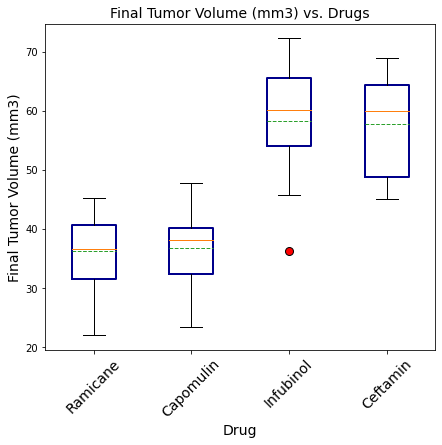

In [104]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxprops=dict(linestyle='-', linewidth=2, color='darkblue')
flierprops = dict(marker='o', markerfacecolor='red', markersize=8,
                  linestyle='none')

drugs = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']
data = [ramicane_mice_fv, capomulin_mice_fv, infubinol_mice_fv, ceftamin_mice_fv]
fig1, ax1 = plt.subplots(figsize=(7,6))
ax1.set_xlabel('Drug', fontsize=14)
ax1.set_ylabel('Final Tumor Volume (mm3)', fontsize=14)
ax1.set_title('Final Tumor Volume (mm3) vs. Drugs', fontsize=14)

ax1.boxplot(data, boxprops=boxprops, flierprops=flierprops, showmeans=True, meanline=True)

ax1.set_xticklabels(drugs, rotation=45, fontsize=14)
plt.show()

## Line and scatter plots

In [105]:
combined_mice.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [106]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = combined_mice.loc[(combined_mice['Drug Regimen'] == 'Capomulin'), ['Weight (g)', 'Timepoint','Tumor Volume (mm3)']]
capomulin_mouse.head()

,Weight (g),Timepoint,Tumor Volume (mm3)
Mouse ID,,,
s185,17,0,45.000000
s185,17,5,43.878496
s185,17,10,37.614948
s185,17,15,38.177232
s185,17,20,36.866876


In [110]:
chosen_cap_mouse = capomulin_mouse.sample(1).index
print(chosen_cap_mouse)

Index(['r944'], dtype='object', name='Mouse ID')


In [111]:
capomulin_mouse_trimmed = capomulin_mouse.loc[chosen_cap_mouse] 

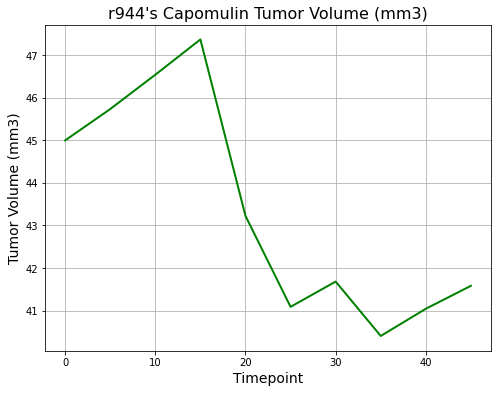

In [112]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.figure(figsize=(8,6))
rand_cap_tumor_volume, = plt.plot(capomulin_mouse_trimmed['Timepoint'], capomulin_mouse_trimmed['Tumor Volume (mm3)'], color="green", linewidth=2)
plt.title(chosen_cap_mouse[0] + "'s Capomulin Tumor Volume (mm3)", fontsize=16)
plt.xlabel("Timepoint", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.grid()
plt.show()

In [113]:
# Generate a scatter plot of time point versus tumor volume for a random group of mice treated with Capomulin:
# Update nsample for desired random group-size
nsample = 10
sample_cap_mouse = capomulin_mouse.sample(nsample).index
capomulin_mouse_trimmed = capomulin_mouse.loc[sample_cap_mouse] 

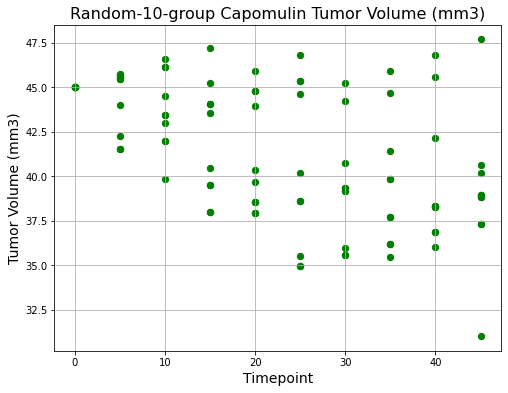

In [114]:
plt.figure(figsize=(8,6))
group_cap_tumor_volume = plt.scatter(capomulin_mouse_trimmed['Timepoint'], capomulin_mouse_trimmed['Tumor Volume (mm3)'], s=40, color="green")
plt.title(f'Random-{nsample}-group Capomulin Tumor Volume (mm3)', fontsize=16)
plt.xlabel("Timepoint", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.grid()
plt.show()

In [115]:
mice_capomulin = combined_mice.loc[(combined_mice['Drug Regimen'] == 'Capomulin')]
mice_capomulin

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,5,43.878496,0
s185,Capomulin,Female,3,17,10,37.614948,0
s185,Capomulin,Female,3,17,15,38.177232,0
s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...
i557,Capomulin,Female,1,24,45,47.685963,1
r157,Capomulin,Male,22,25,0,45.000000,0
r157,Capomulin,Male,22,25,5,45.597064,0


In [116]:
mice_cap = mice_capomulin.groupby(['Mouse ID']).mean()
mice_cap=mice_cap.reset_index()
mice_cap.head()

,Mouse ID,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,9.0,22.0,22.5,41.963636,0.7
1,b742,7.0,21.0,22.5,40.083699,0.0
2,f966,16.0,17.0,10.0,36.505973,0.0
3,g288,3.0,19.0,22.5,41.990097,0.8
4,g316,22.0,22.0,22.5,44.613344,1.0


In [117]:
aver_mice_cap = mice_cap[['Mouse ID', 'Weight (g)','Tumor Volume (mm3)']]
aver_mice_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22.0,41.963636
1,b742,21.0,40.083699
2,f966,17.0,36.505973
3,g288,19.0,41.990097
4,g316,22.0,44.613344


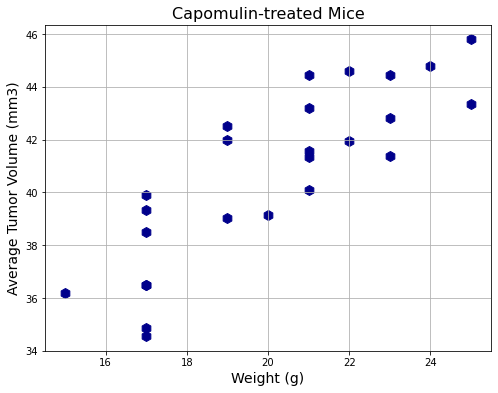

In [118]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight = aver_mice_cap['Weight (g)']
mean_capomulin_vol = aver_mice_cap['Tumor Volume (mm3)']

plt.figure(figsize=(8,6))
plt.scatter(weight, mean_capomulin_vol, s=100, color = 'darkblue', marker='h')
plt.xlabel("Weight (g)", fontsize=14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.title("Capomulin-treated Mice", fontsize=16)

plt.grid()
plt.show()

The correlation coefficient between mice weight and average tumor volume is 0.84
The R-squared is: 0.84


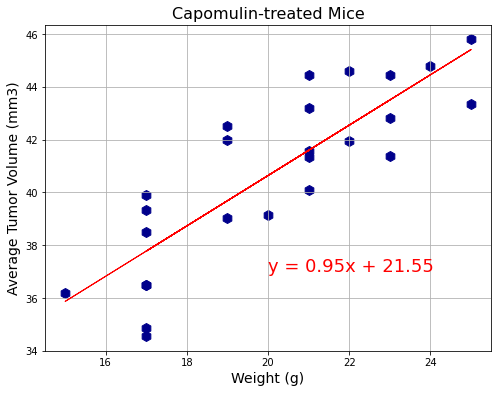

In [119]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, mean_capomulin_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(weight, mean_capomulin_vol, s=100, color = 'darkblue', marker='h')
plt.plot(weight,regress_values,"r-", linewidth=1)

plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.title("Capomulin-treated Mice", fontsize=16)
plt.annotate(line_eq, xy=(20,37), fontsize=18, color="red")

print(f"The correlation coefficient between mice weight and average tumor volume is {round(st.pearsonr(weight,mean_capomulin_vol)[0],2)}")
print(f"The R-squared is: {round(rvalue, 2)}")

plt.grid()
plt.show()